The task:

Please download fashion-mnist dataset.

Please perform the following steps

1. Do the summary of the data and discuss it.

2. Reduce data dimensionality

3. Visualize the reduced dataset

4. Cluster the dataset (and evaluate clustering results with classification labels). Do we have some outliers here?

5. Split the dataset into training and testing.

6. Perform classification and evaluate its result.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Import dataset and read it via pandas
import pandas as pd
import numpy as np
# import kagglehub


file = open("/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv", "r")
data = pd.read_csv(file,sep=",",header = None)
# label = data[0]
data  = data.drop(0, axis=0)
# data  = data.drop(0, axis=1)
data

<ipython-input-6-96630d8d6fe4>:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
4,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
5,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.utils import resample
#For data presented on report I used n=30k. However, i waited a lot for some operations like tsne and agglomerative clustering.
#Mostly i used smaller values like 1k or 10k to experiment with different parameters

array = resample(data, n_samples=30000, random_state=0)
# array = pd.DataFrame(data)
array = pd.DataFrame(array)
label = array[0]
array  = array.drop(0, axis=1)

# array = np.array(array, dtype=int)
# from scipy import stats

# mean = np.mean(array)
# mode = stats.mode(array).mode[0]
# median = np.median(array)
# std_dev = np.std(array)
# variance = np.var(array)


# print("Mean: " + str(mean))
# print("Mode: " + str(mode))
# print("Median: " + str(median))
# print("Standard Deviation: " + str(std_dev))
# print("Variance: " + str(variance))

array

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
2733,0,0,0,0,0,0,0,0,0,150,...,50,15,0,0,0,0,0,0,0,0
43568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42614,0,0,0,0,0,0,0,0,72,170,...,29,39,45,53,0,0,0,0,0,0
52417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34847,0,0,0,0,0,0,0,0,21,0,...,73,59,117,49,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt
array = np.array(array, dtype=float)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
array = scaler.fit_transform(array)
print(array)
# for i in range(9):
#     img = array[i, :784].reshape(28, 28)
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()





[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


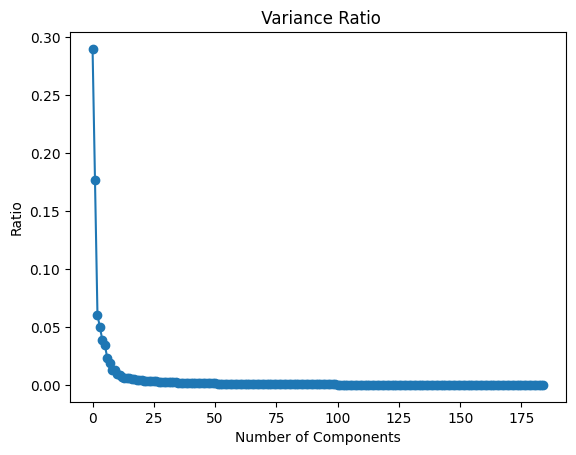

In [9]:
#Do the summary of the data
#!pip install scikit-plot

from sklearn.decomposition import PCA

#N=784
variance = 0.95 #according to lecture slides, we should keep pca > 90%
# N=20
# pca = PCA(n_components=N)
pca = PCA(variance)
pca.fit(array)
# print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Ratio')
plt.title(' Variance Ratio')
plt.show()
pca_array=pca.transform(array)
pd_array = pd.DataFrame(pca_array)


In [10]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
#Define functions
def print_scatter(data_2d,predicted_array,title):
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=predicted_array)
    plt.title(title + ' Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

def print_result(classification_array):
    fig, axes = plt.subplots(12, 12, figsize=(12, 12))
    for i in range(144):
        img = array[i].reshape(28, 28)
        plt.subplot(12, 12, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        title = classification_array[i]
        plt.title(title, fontsize=6)

        # plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0.45)
    plt.show()

def print_cluster_centers(kmeans,pca_array):
      index = pairwise_distances_argmin(kmeans.cluster_centers_, pca_array)
      for i in range(10):
          plt.subplot(3, 4, i + 1)
          img = array[index[i]].reshape(28,28)
          title = str(i)
          plt.title(title)
          plt.imshow(img, cmap='gray')
          plt.axis('off')
      plt.show()

def print_score(label,predicted):
    print("Rand Score = " + str(rand_score(label, predicted)))
    print("AMI Score = " + str(adjusted_mutual_info_score(label, predicted)))
    print("ARI Score = " + str(adjusted_rand_score(label, predicted)))

def show_cluster(nr, predicted):
    reshaped = array.reshape(-1, 28, 28)
    temp = np.where(predicted == nr)[0]
    length = len(temp) if len(temp) < 100 else 100
    plt.figure(figsize=(20, 20))
    for i in range(length):
        plt.subplot(10, 10, i + 1)
        plt.imshow(reshaped[temp[i]], cmap='binary')
        plt.axis('off')
    plt.suptitle('Cluster ' + str(nr))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
# for i in range(36):
#     img = array[i, :784].reshape(28, 28)
#     plt.subplot(6, 6, i + 1)
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()
# pca = PCA(n_components=2)
# data_2d = pca.fit_transform(pca_array)
# print_scatter(data_2d,label,'PCA')

In [11]:
#Scatter matrix
# pd.plotting.scatter_matrix(pd_array)


Cluster 0 has 1143 el
Cluster 1 has 3790 el
Cluster 2 has 3636 el
Cluster 3 has 1373 el
Cluster 4 has 4899 el
Cluster 5 has 3723 el
Cluster 6 has 4560 el
Cluster 7 has 2215 el
Cluster 8 has 1320 el
Cluster 9 has 3341 el


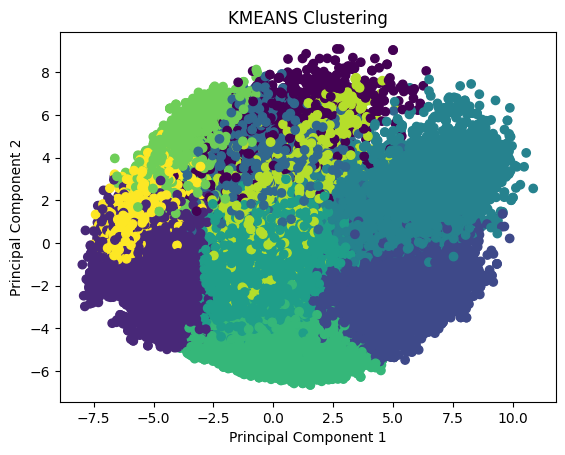

Rand Score = 0.8743057168572286
AMI Score = 0.5179475155383808
ARI Score = 0.35637242735137836


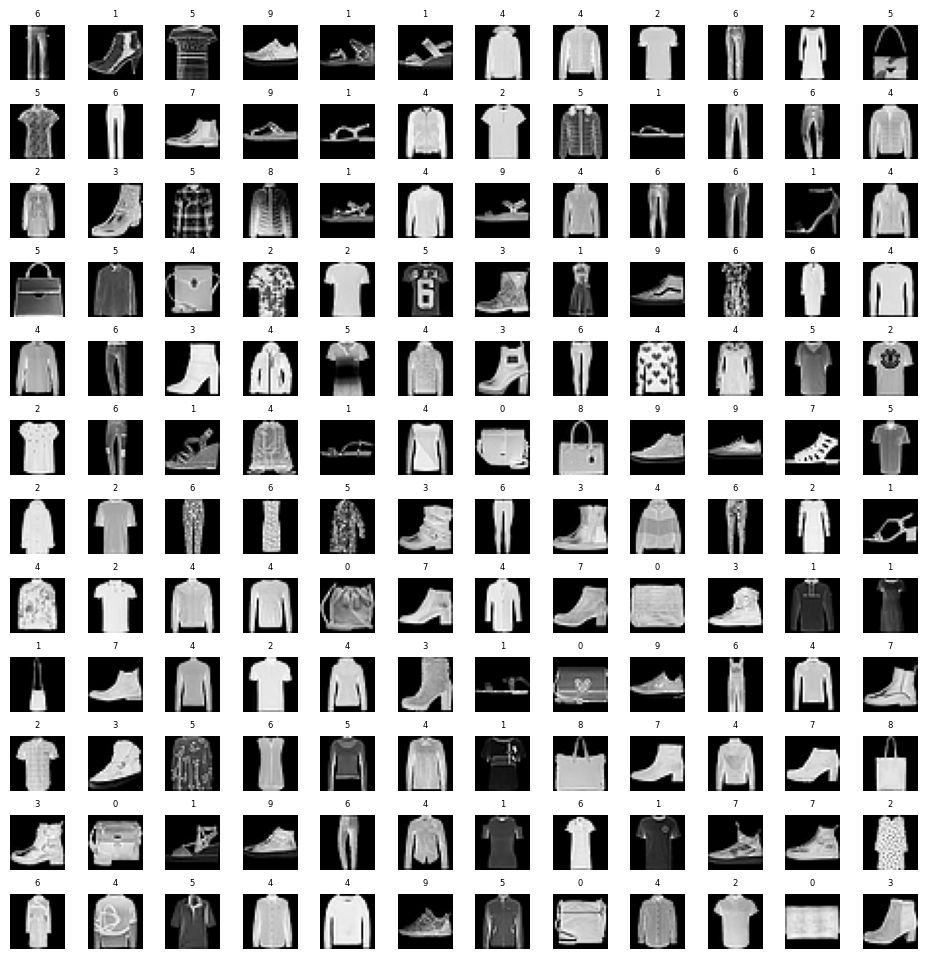

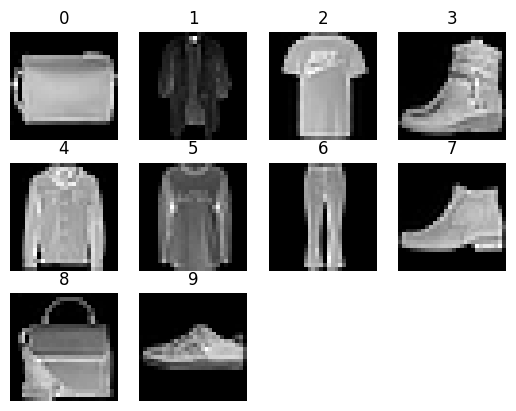

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score



kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(pca_array)
predicted_kmeans = kmeans.labels_

pca = PCA(n_components=2)
data_2d = pca.fit_transform(pca_array)


label = np.array(label, dtype=int)

unique, count = np.unique(predicted_kmeans, return_counts=True)
for v, k in zip(unique, count):
    print("Cluster " + str(v) + " has " + str(k) + " el")

print_scatter(data_2d,predicted_kmeans,'KMEANS')
print_score(label,predicted_kmeans)
print_result(predicted_kmeans)
print_cluster_centers(kmeans,pca_array)

Rand Score = 0.8797575030278787
AMI Score = 0.5349972421678775
ARI Score = 0.36664408291530487


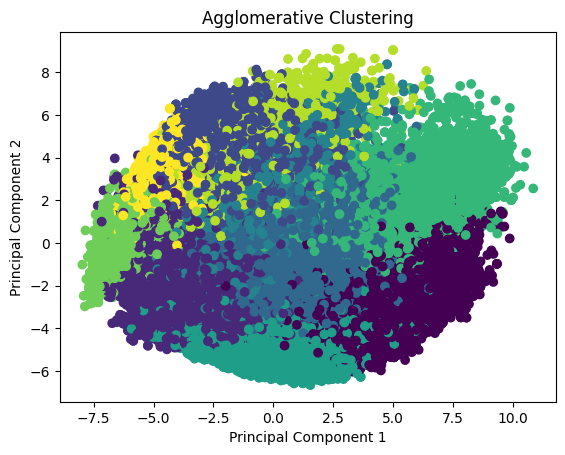

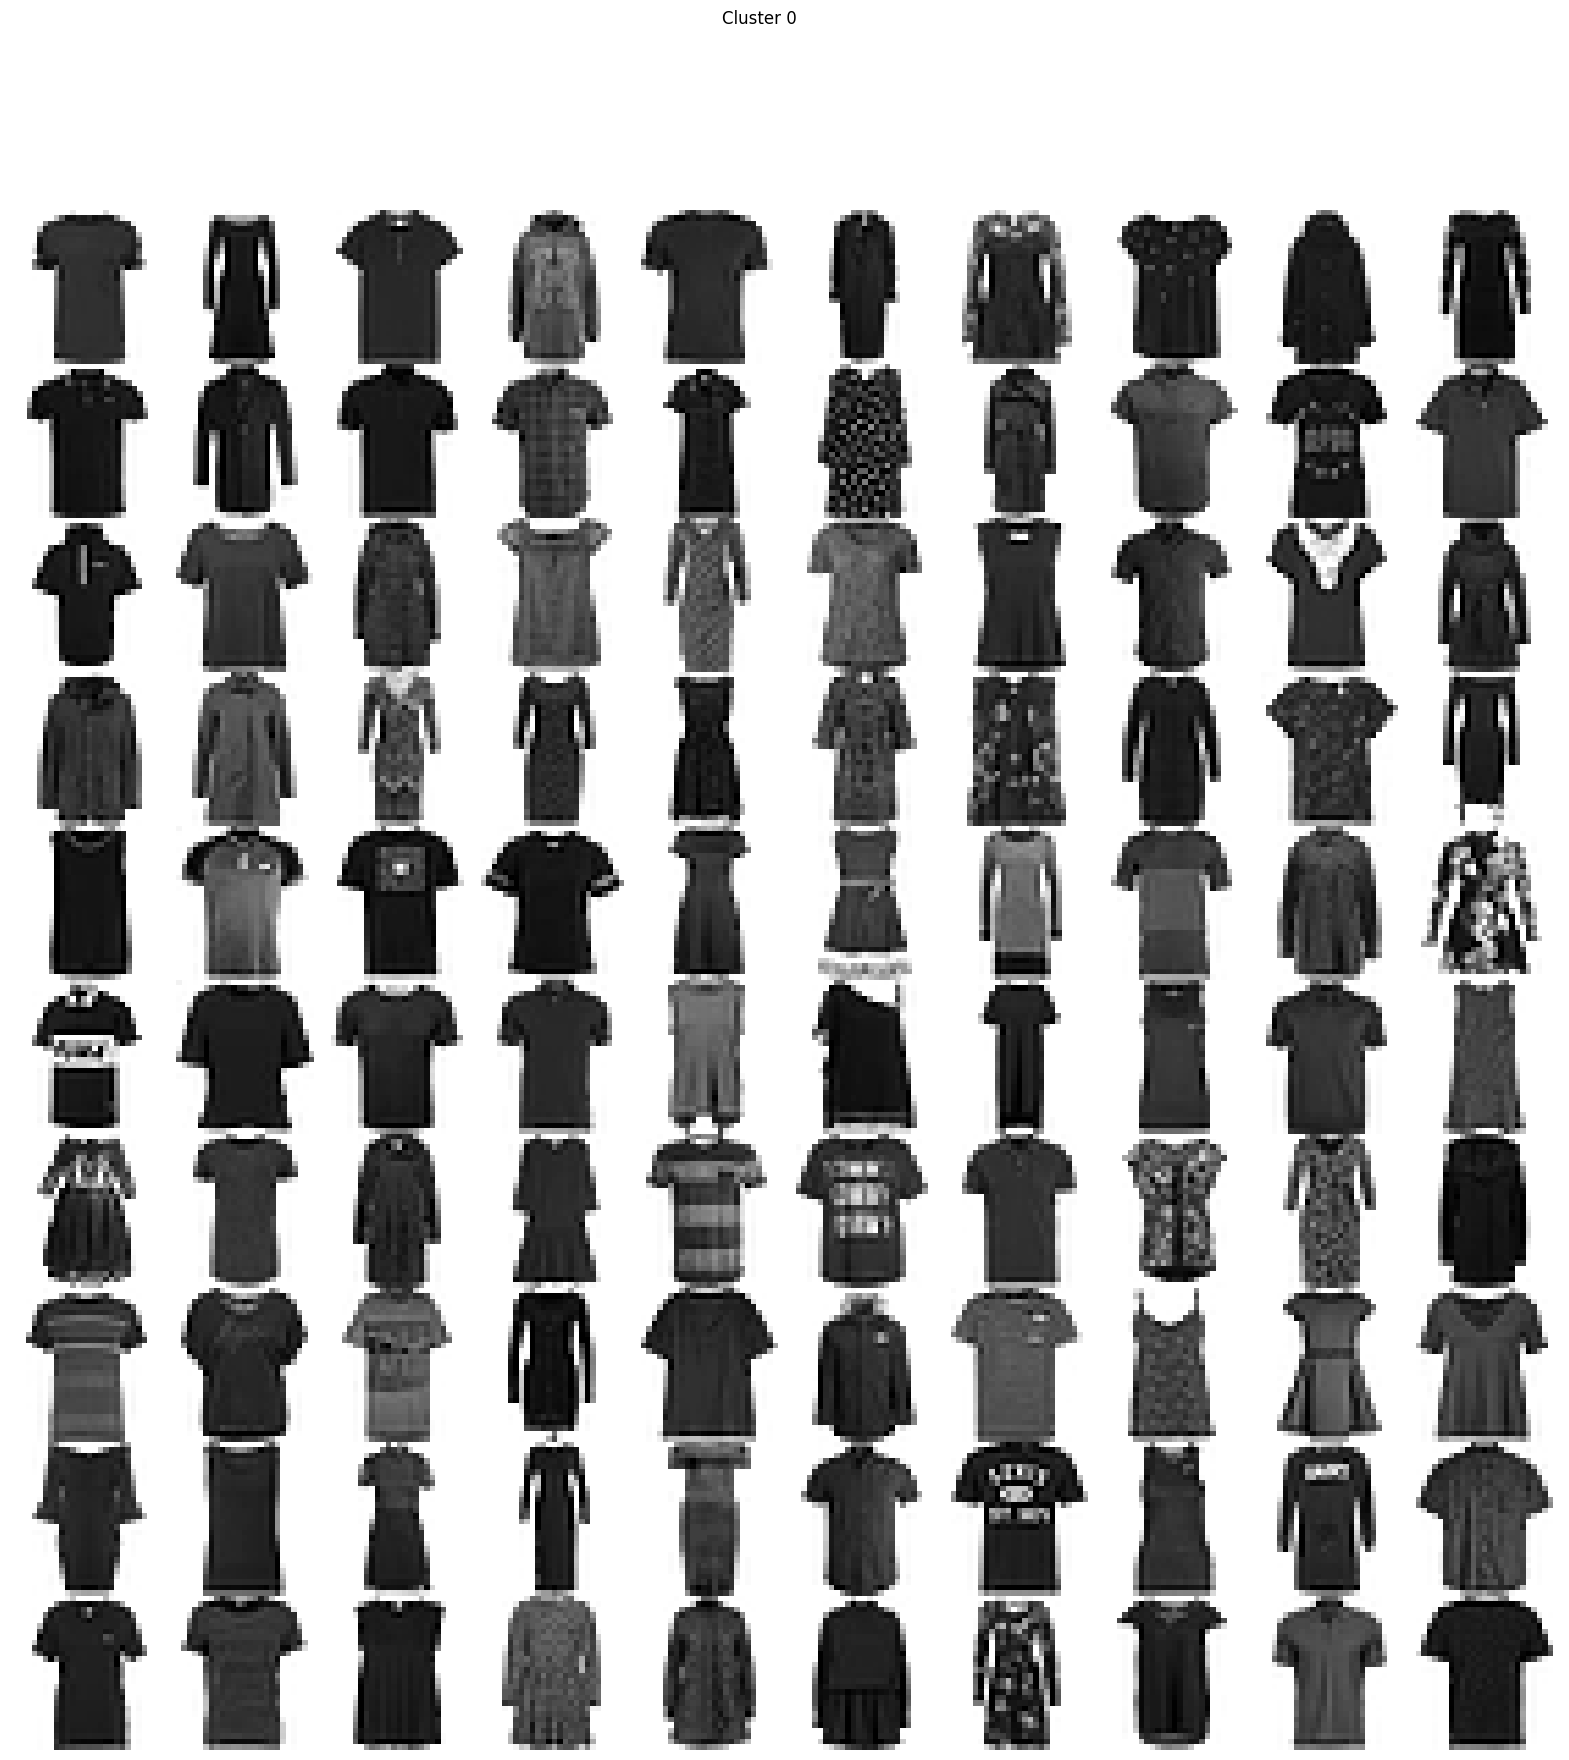

In [13]:
from sklearn.cluster import AgglomerativeClustering

agclustering = AgglomerativeClustering(n_clusters=10).fit(pca_array)
labels = agclustering.labels_

pca = PCA(n_components=2)
data_2d = pca.fit_transform(pca_array)

print_score(label,labels)
print_scatter(data_2d,labels, 'Agglomerative')
# print_result(labels)
show_cluster(0,labels)
# print_cluster_centers(,pca_array)

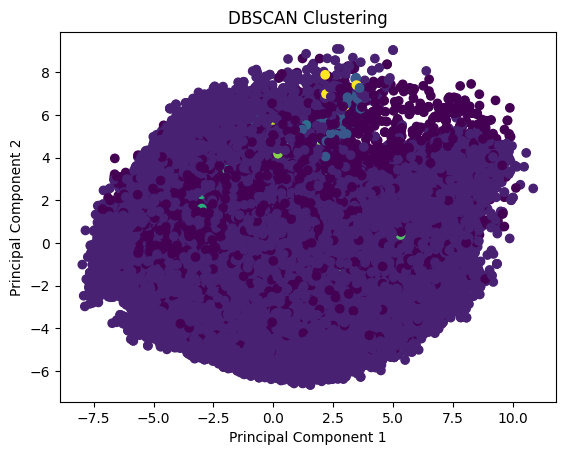

Rand Score = 0.3313822038512395
AMI Score = 0.0478637727657379
ARI Score = 0.01002747006042415


In [14]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=4.3, min_samples=9).fit(pca_array)
predicted = clustering.labels_

pca = PCA(n_components=2)
data_2d = pca.fit_transform(pca_array)

print_scatter(data_2d,predicted,'DBSCAN')

print_score(label,predicted)
# print_result(predicted)
# print_cluster_centers(clustering,pca_array)


(30000, 2)


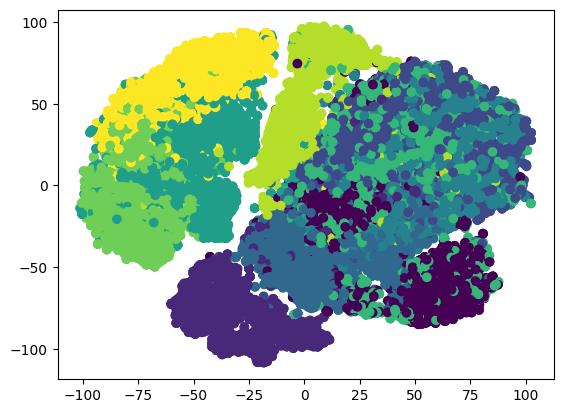

In [15]:
#Let's try TSNE
from sklearn.manifold import TSNE
tsne = TSNE(2)
tsne_array= tsne.fit_transform(array)
print(tsne_array.shape)
plt.scatter(tsne_array[:,0], tsne_array[:,1], c=label)

Rand Score = 0.8807257441914731
AMI Score = 0.532187661993308
ARI Score = 0.35279879077379556


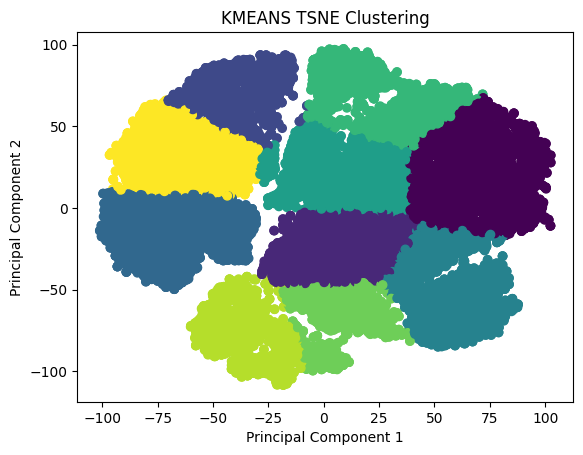

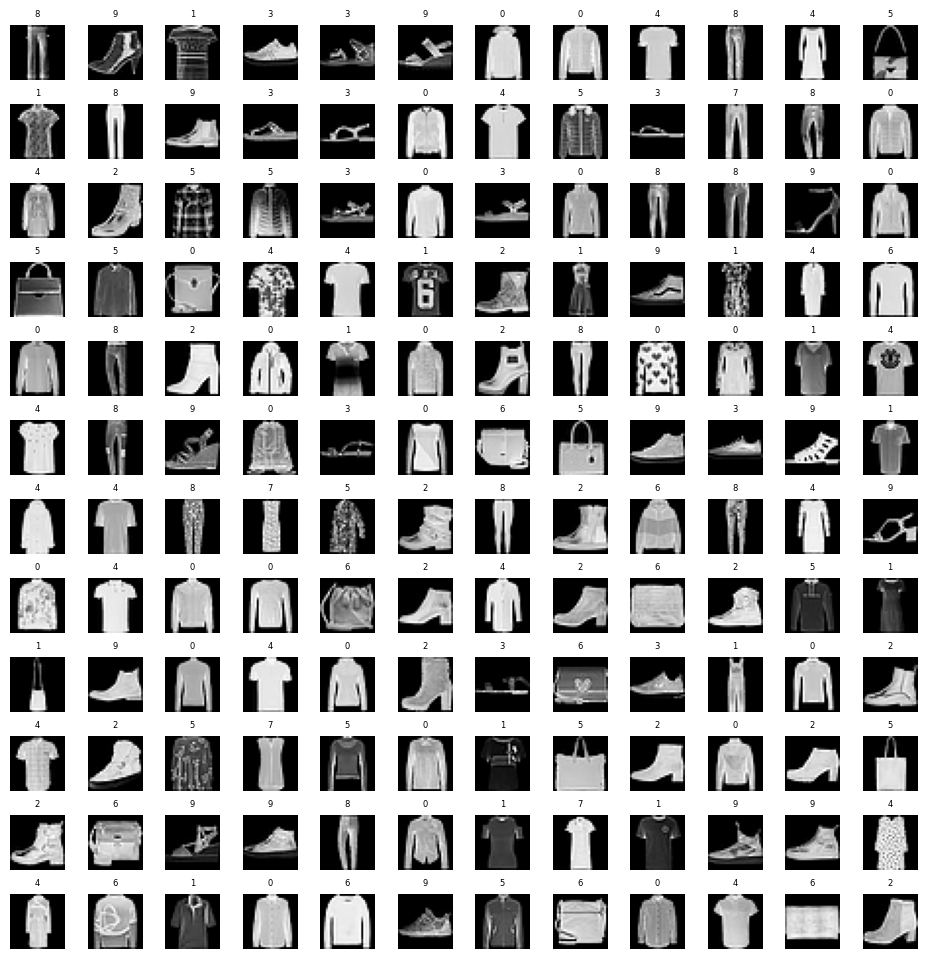

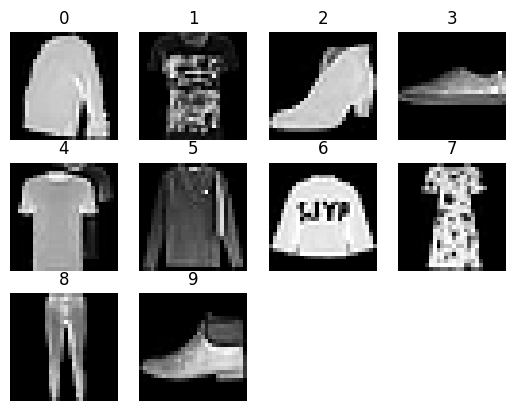

In [16]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(tsne_array)
predicted_kmeans = kmeans.labels_

print_score(label,predicted_kmeans)
print_scatter(tsne_array,predicted_kmeans, 'KMEANS TSNE')
print_result(predicted_kmeans)
print_cluster_centers(kmeans,tsne_array)

Rand Score = 0.6376083913908241
AMI Score = 0.5189410995580455
ARI Score = 0.21818257703953142


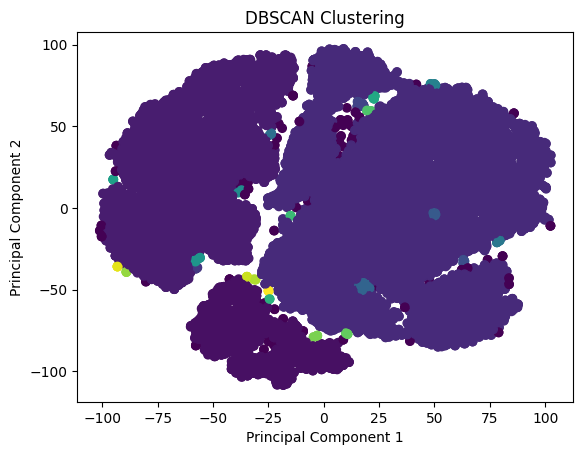

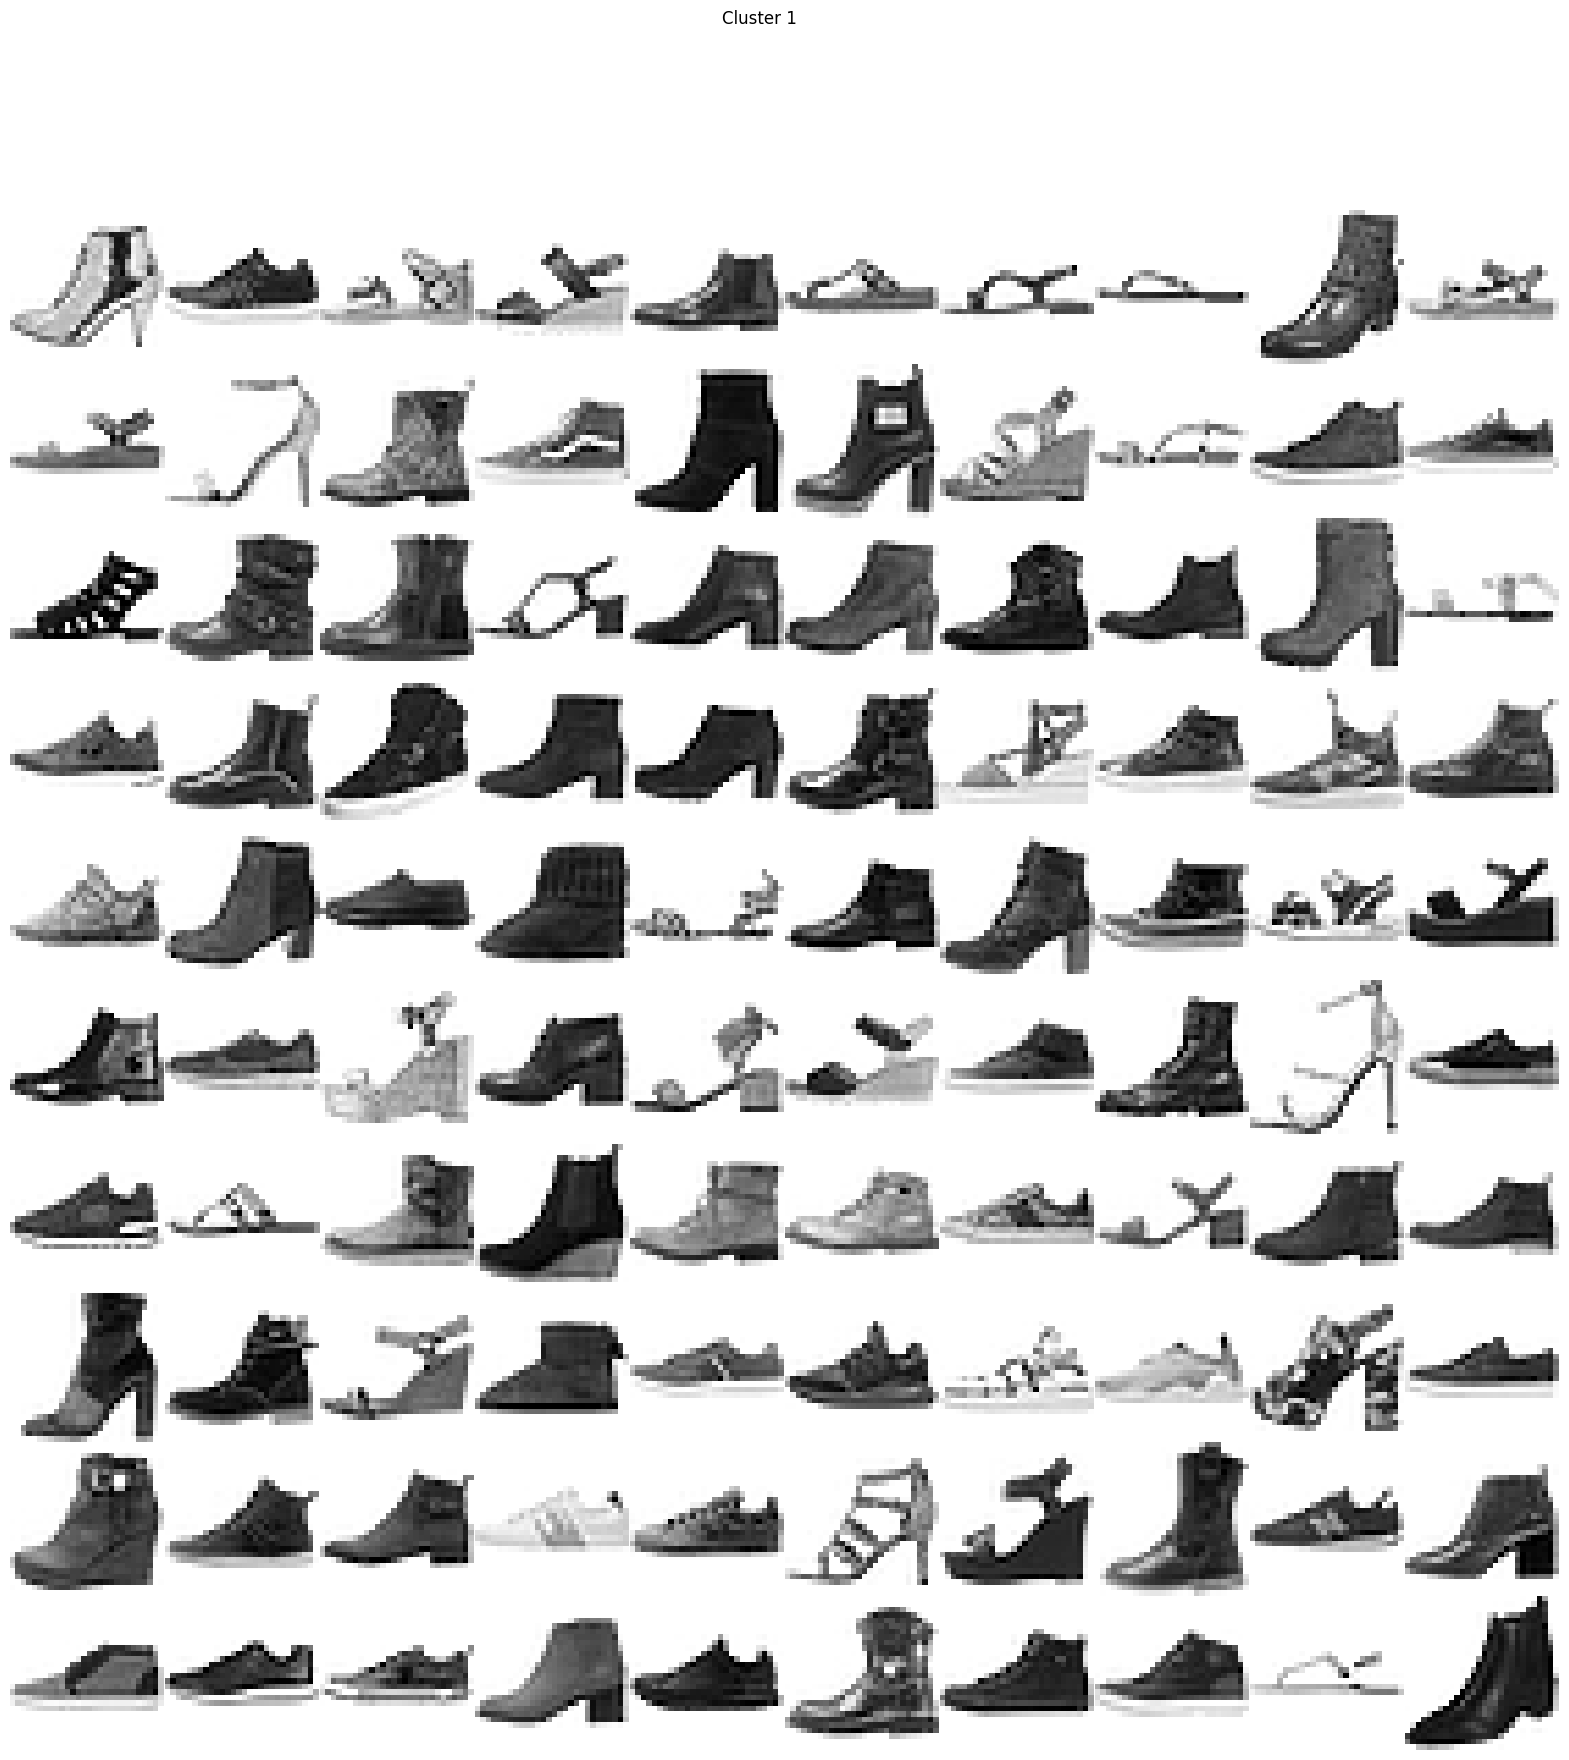

In [17]:
clustering = DBSCAN(eps=2.7, min_samples=4).fit(tsne_array)
predicted = clustering.labels_

print_score(label,predicted)
print_scatter(tsne_array,predicted,'DBSCAN')
# print_result(predicted)
show_cluster(1, predicted)

Rand Score = 0.8859296732113293
AMI Score = 0.5437428520611162
ARI Score = 0.3769605170178141


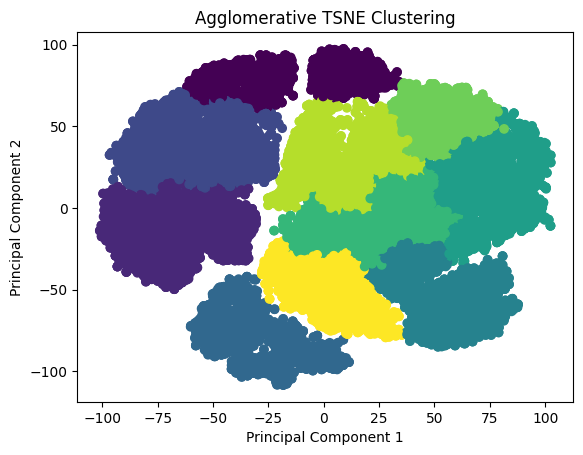

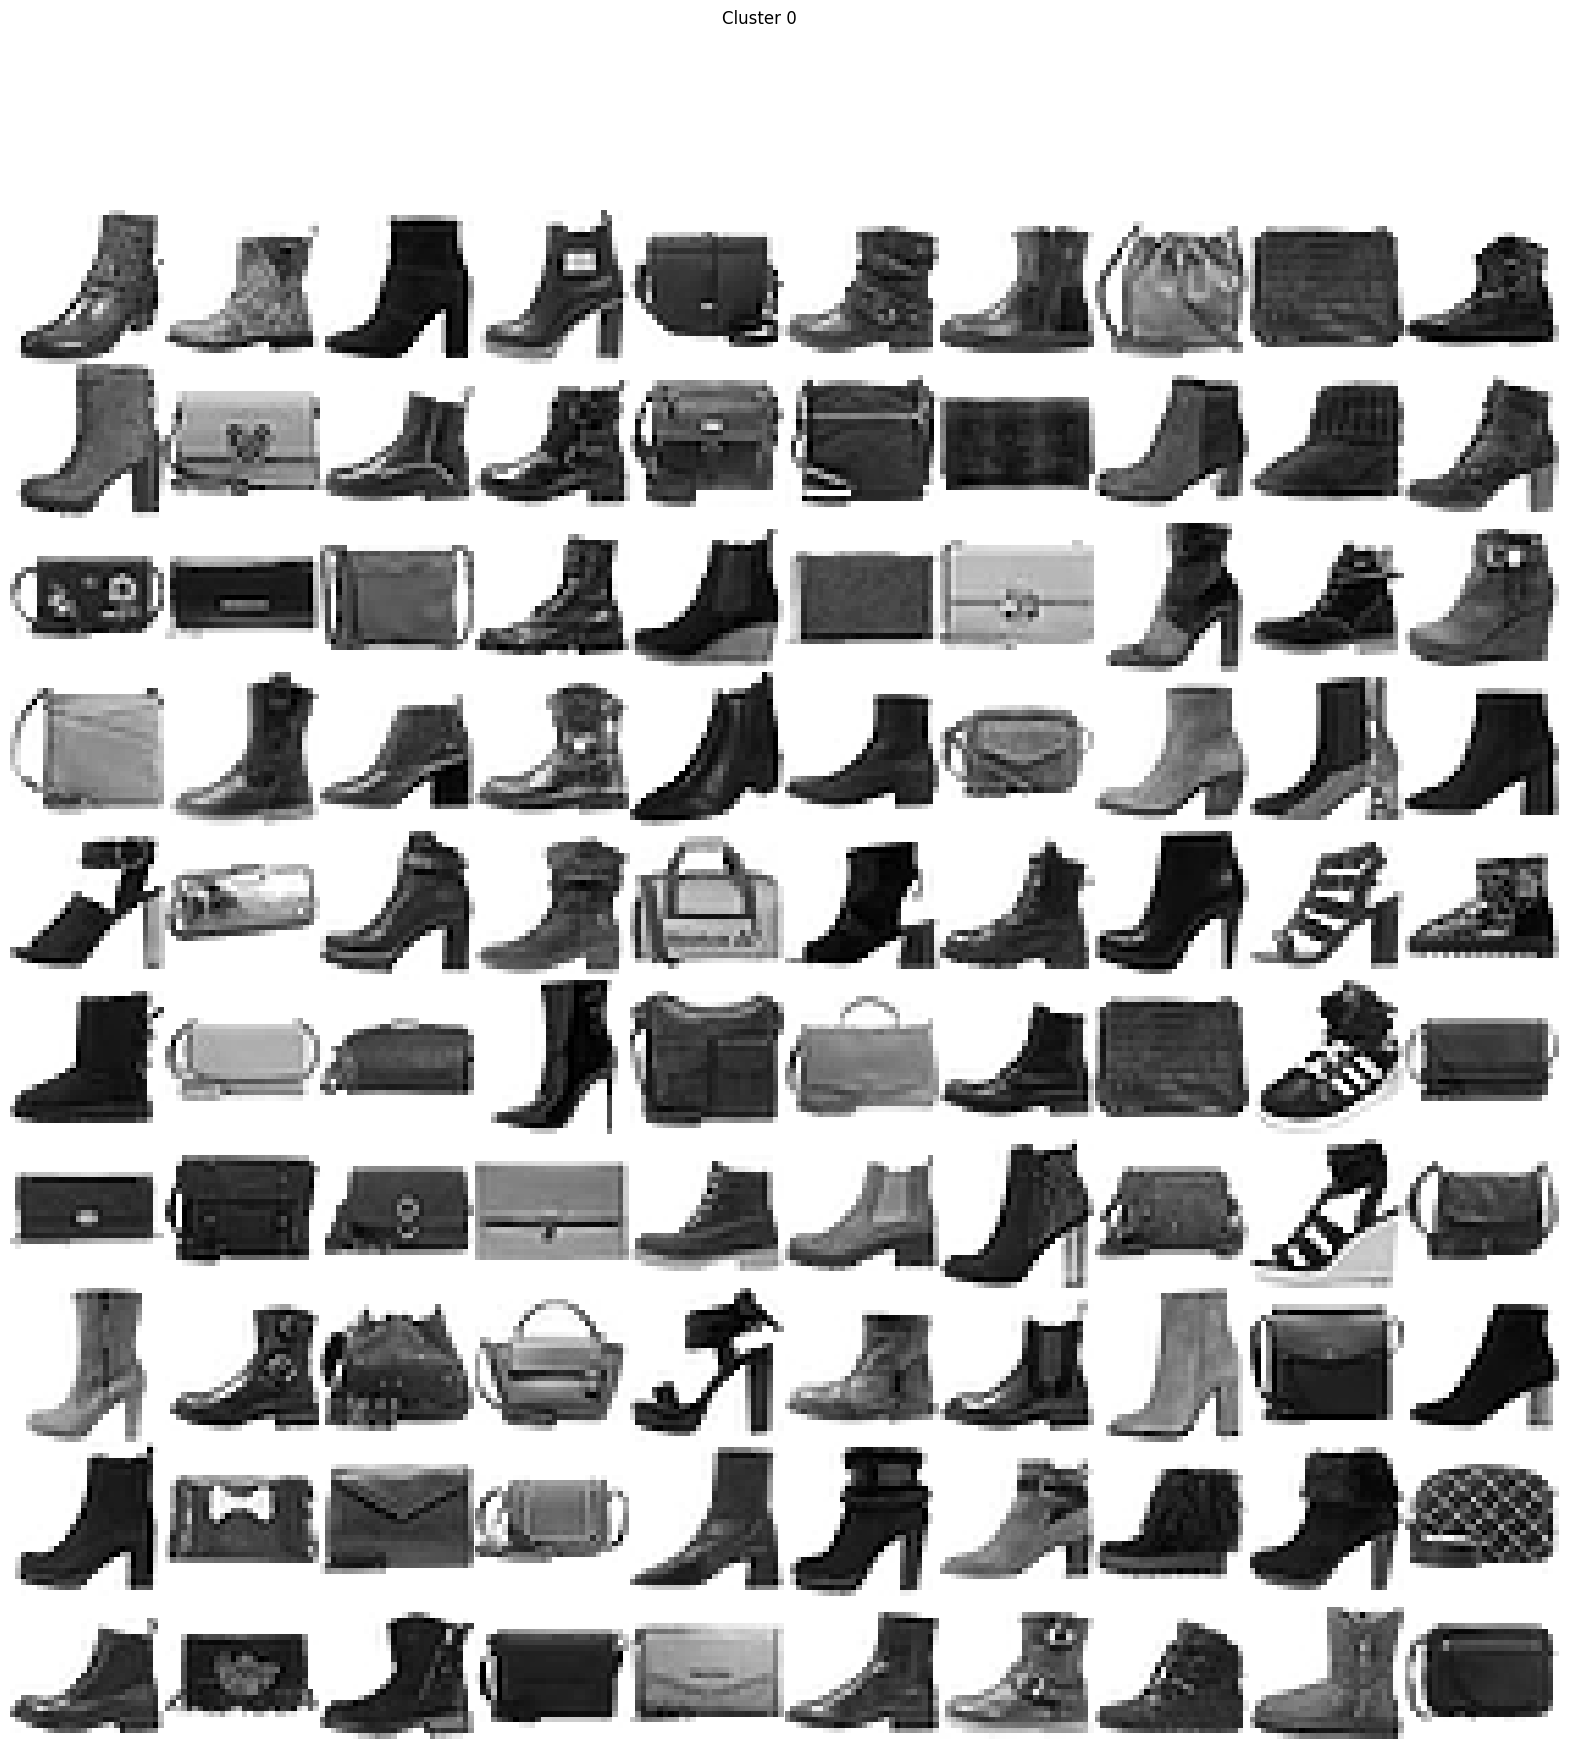

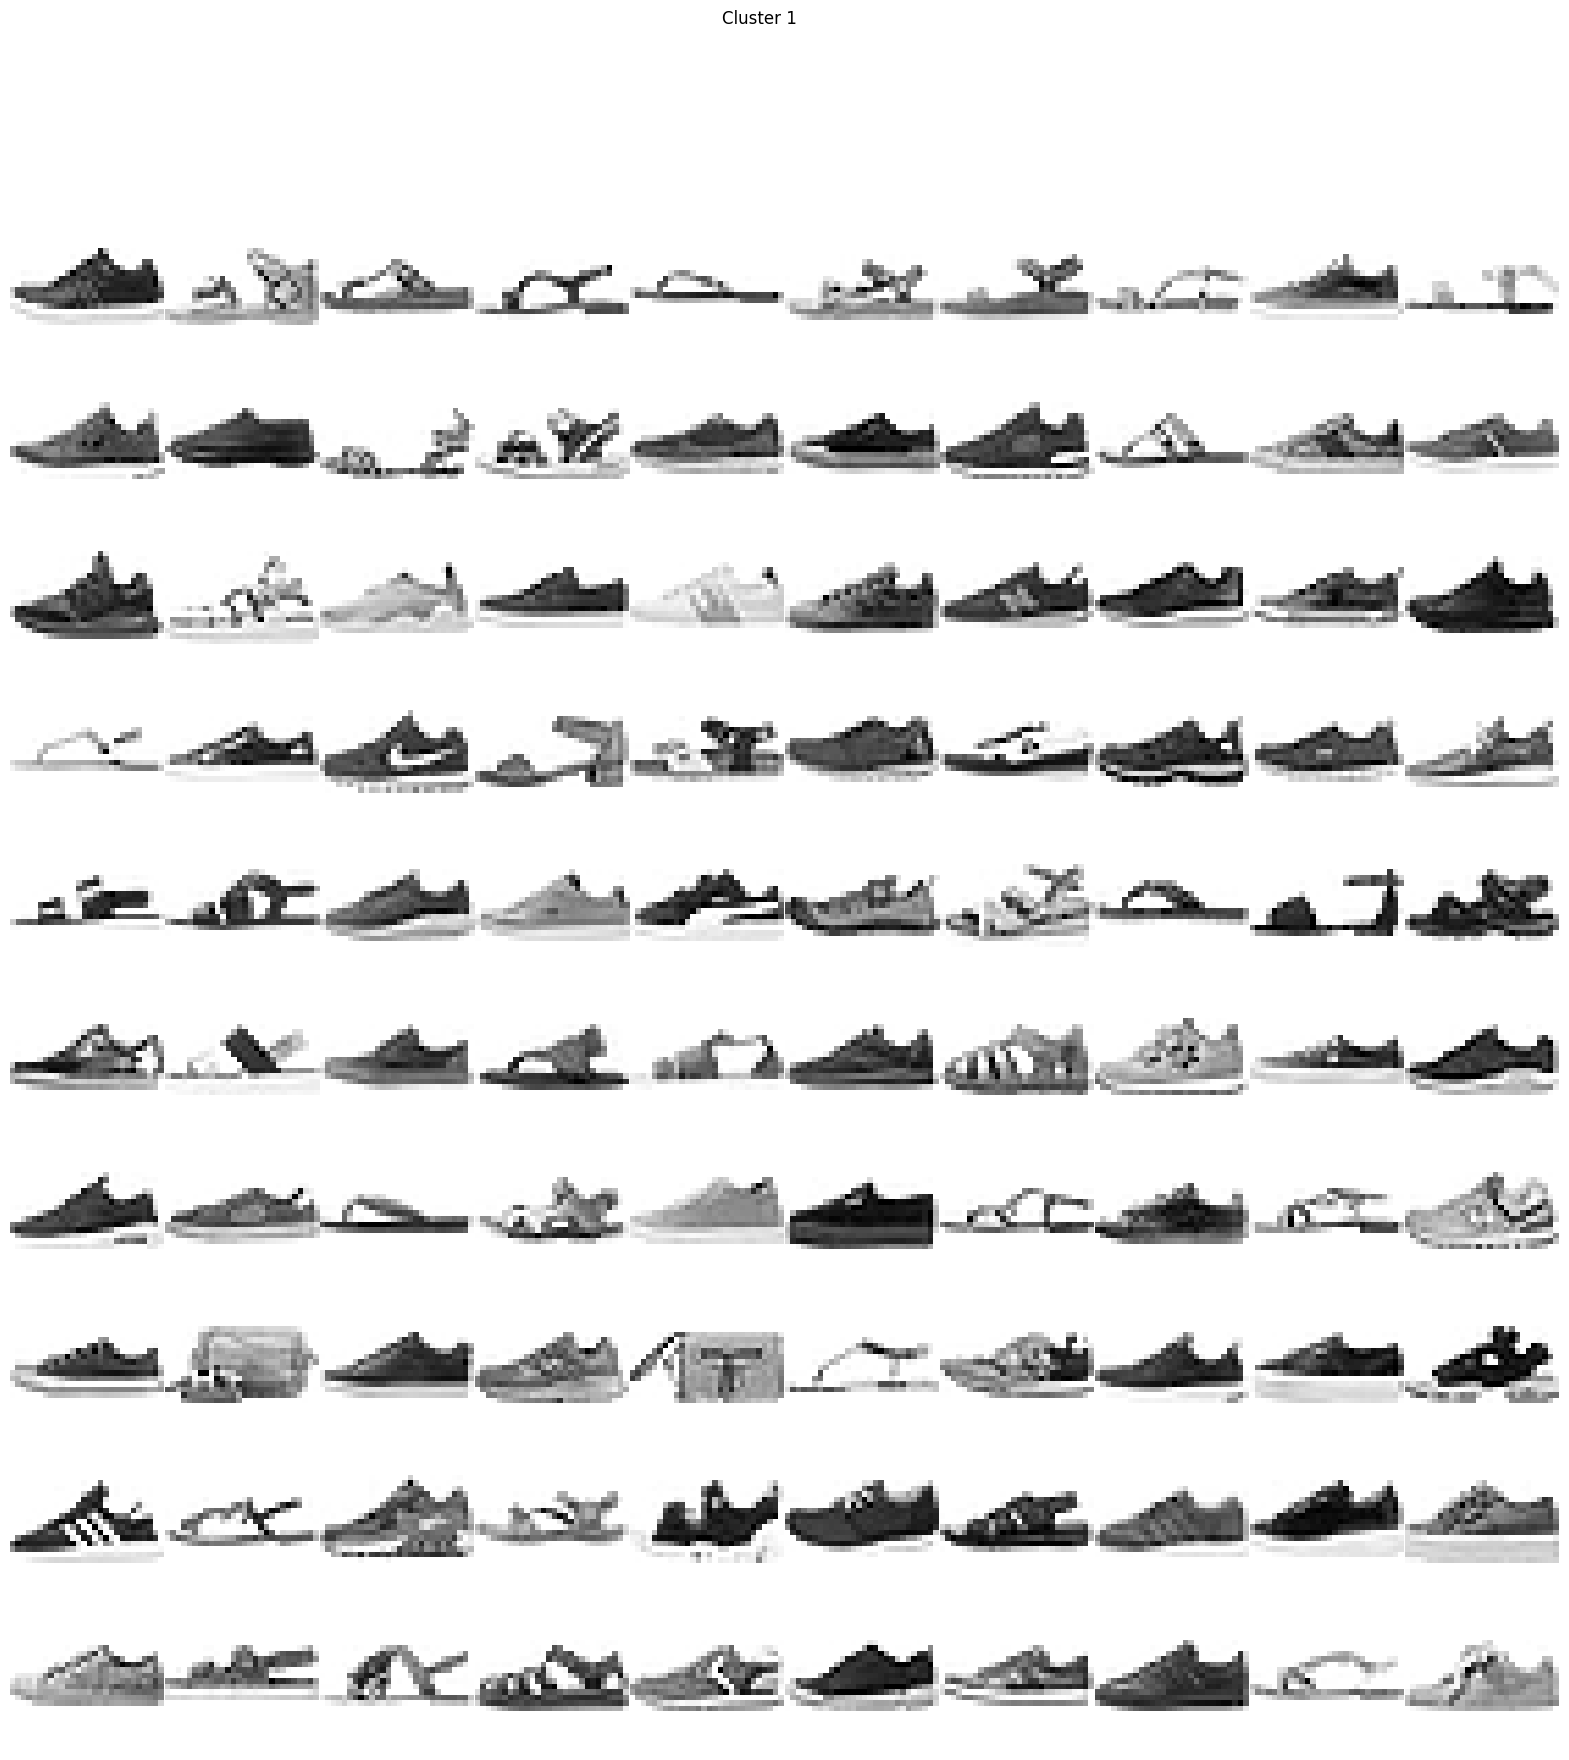

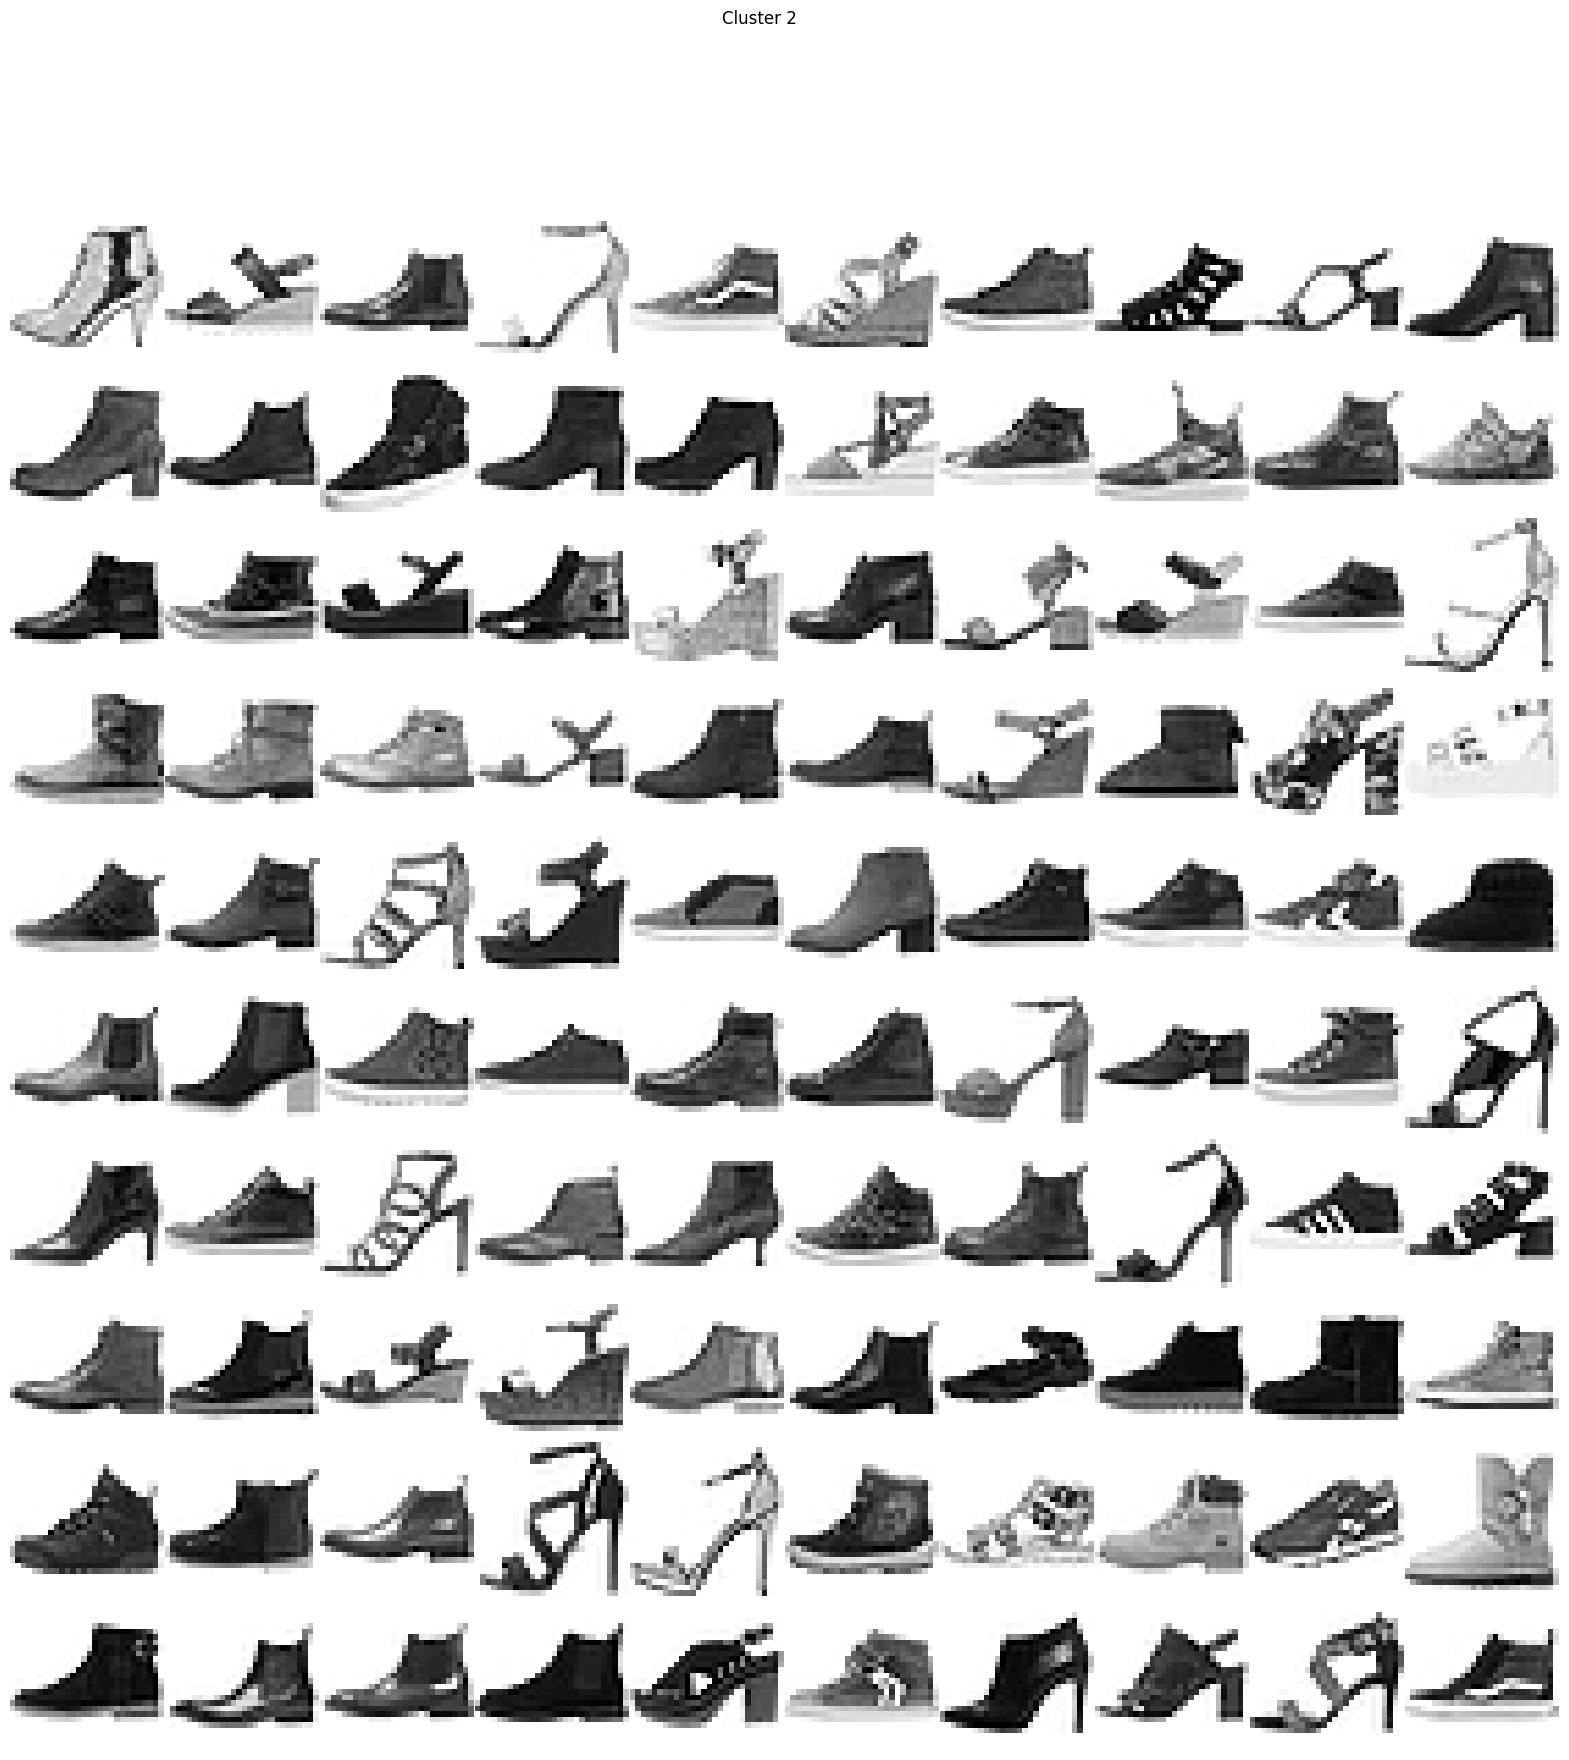

In [18]:
agclustering = AgglomerativeClustering(n_clusters=10).fit(tsne_array)
labels = agclustering.labels_


print_score(label,labels)
print_scatter(tsne_array,labels, 'Agglomerative TSNE')
# print_result(labels)
show_cluster(0,labels) # bags + tops
show_cluster(1,labels) # boots
show_cluster(2,labels) # pullovers  + dresses

In [ ]:
#Split the dataset into training and testing.
from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_array, label, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(tsne_array, label, random_state=42)


0.8353333333333334
0.9642850892165511


<Axes: >

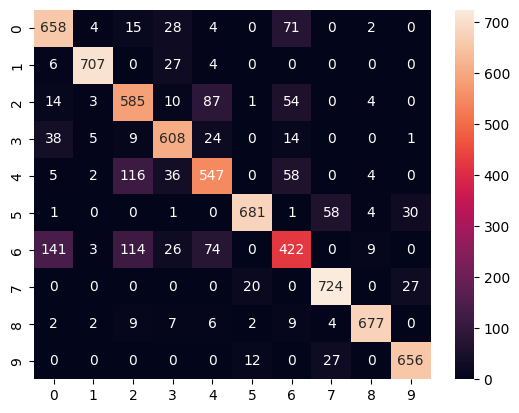

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)
prediction = neigh.predict(X_test)
print(accuracy_score(y_test,prediction))
prediction_probs = neigh.predict_proba(X_test)
print(roc_auc_score(y_test, prediction_probs, multi_class='ovo'))
sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='.5g')
#n = 5k accuracy 0.7  10k 0.804

0.6224
0.9238691484742527


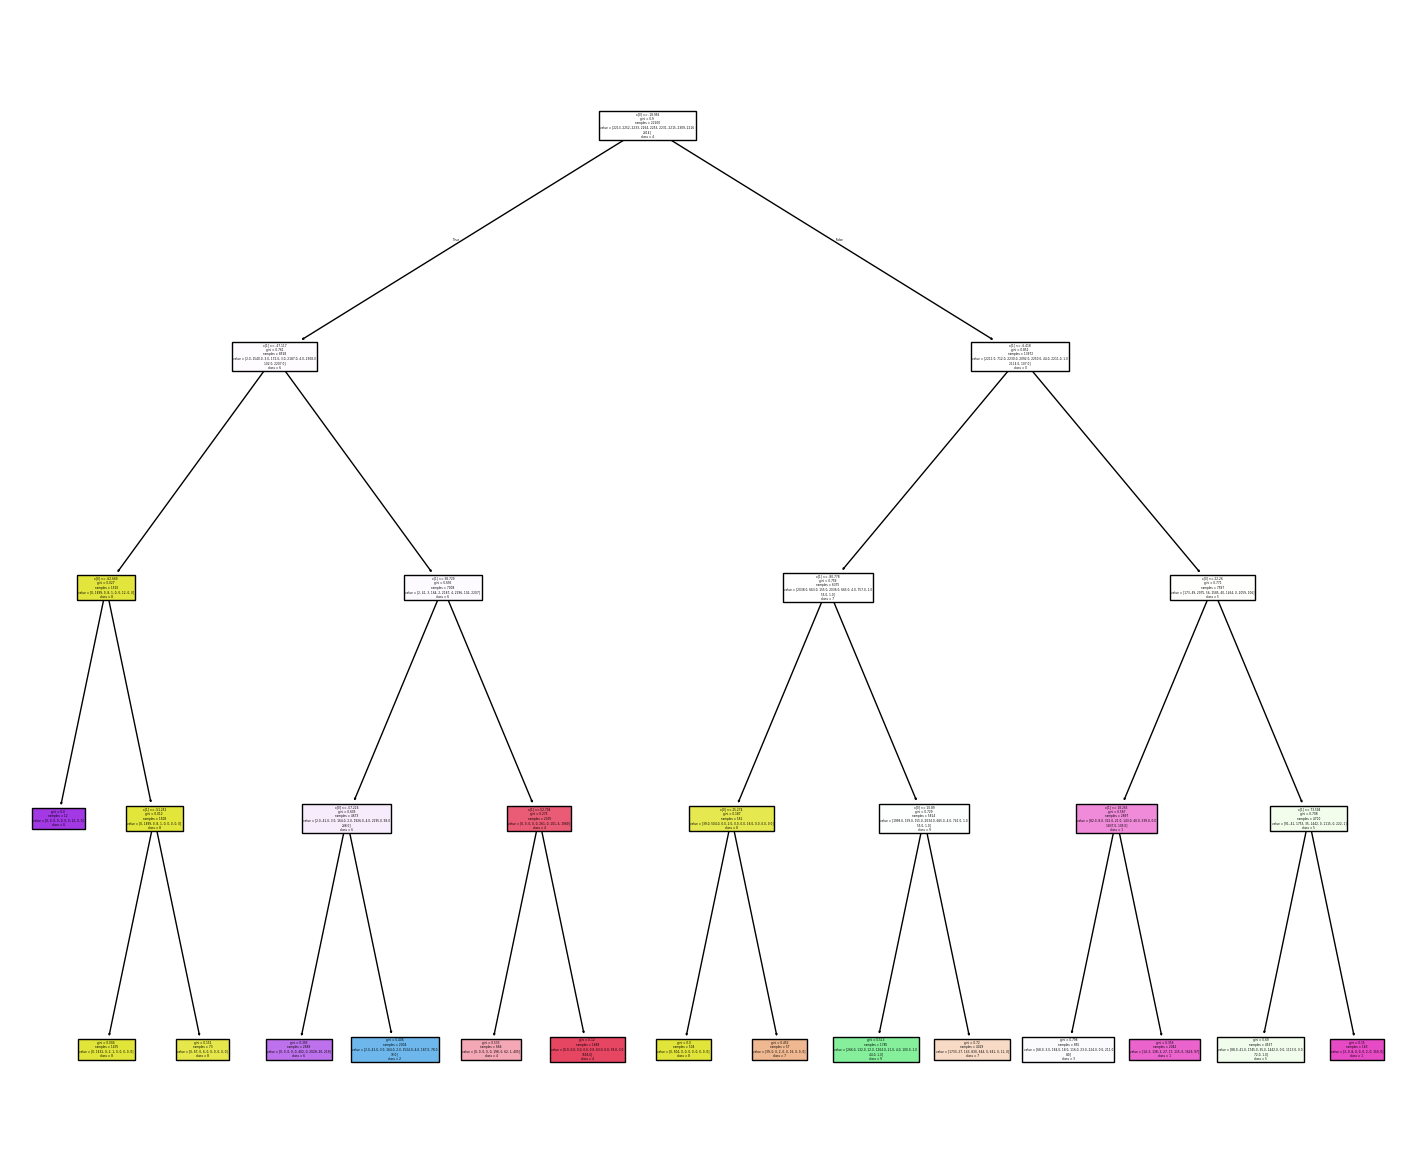

In [ ]:
a = neigh.kneighbors_graph(tsne_array)
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
print(accuracy_score(y_test,tree_clf.predict(X_test)))

prediction_probs = tree_clf.predict_proba(X_test)
print(roc_auc_score(y_test, prediction_probs, multi_class='ovo'))

plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, class_names=pd.unique(y_test).astype(str))
plt.show()

#n = 10k 0.471 depth 3 0.55 depth 4


0.8534666666666667
0.9726721393916515


<Axes: >

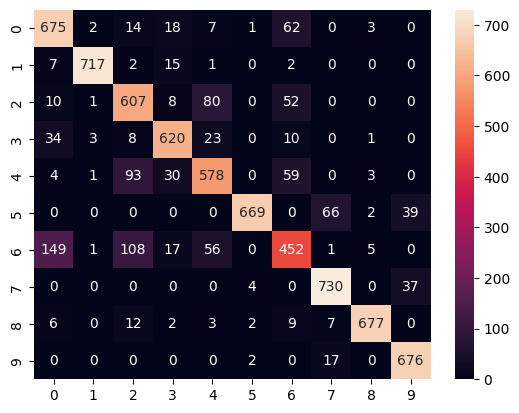

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_pca_train, y_pca_train)
prediction = neigh.predict(X_pca_test)
print(accuracy_score(y_pca_test,prediction))
prediction_probs = neigh.predict_proba(X_pca_test)
print(roc_auc_score(y_test, prediction_probs, multi_class='ovo'))
sns.heatmap(confusion_matrix(y_pca_test,prediction), annot=True, fmt='.5g')

#n= 10k 0.825

Number of mislabeled points out of a total 7500 points : 2579
0.6561333333333333
0.9446183845974134


<Axes: >

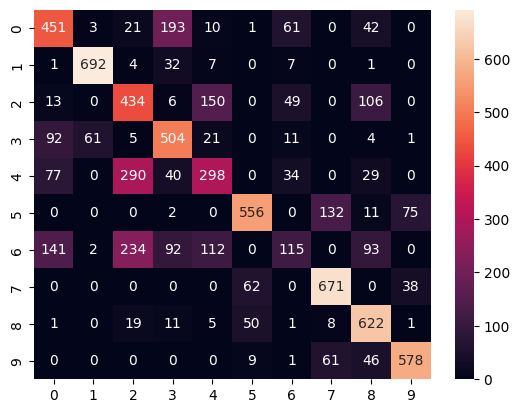

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
prediction = gnb.predict(X_test)

print(accuracy_score(y_test,prediction))

prediction_probs = gnb.predict_proba(X_test)
print(roc_auc_score(y_test, prediction_probs, multi_class='ovo'))

sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='.5g')
#n = 10k 0.67

Number of mislabeled points out of a total 7500 points : 1866
0.7512
0.9506676719986135


<Axes: >

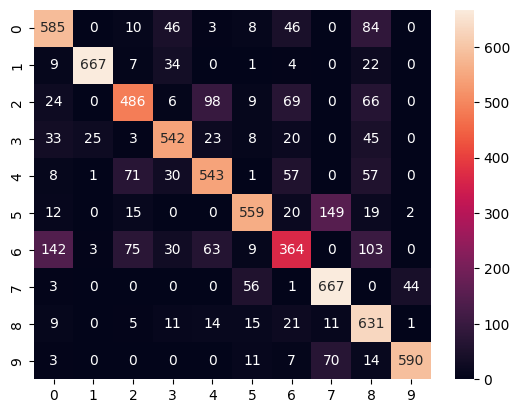

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_pca_train, y_pca_train).predict(X_pca_test)
prediction = gnb.predict(X_pca_test)


print(accuracy_score(y_pca_test,prediction))

prediction_probs = gnb.predict_proba(X_pca_test)
print(roc_auc_score(y_test, prediction_probs, multi_class='ovo'))

sns.heatmap(confusion_matrix(y_pca_test,prediction), annot=True, fmt='.5g')
#n = 10k 0.73

0.8902666666666667
0.9922882364124875


<Axes: >

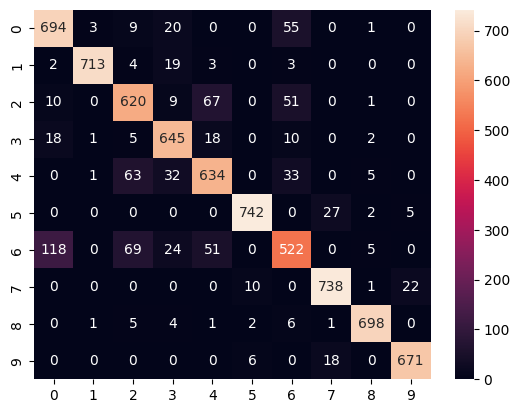

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo', probability=True)
clf.fit(X_pca_train, y_pca_train)
prediction = clf.predict(X_pca_test)
print(accuracy_score(y_pca_test,prediction))

prediction_probs = clf.predict_proba(X_pca_test)
print(roc_auc_score(y_pca_test, prediction_probs, multi_class='ovo'))

sns.heatmap(confusion_matrix(y_pca_test,prediction), annot=True, fmt='.5g')
#n = 10k 0.8632

0.7388
0.9597149705992282


<Axes: >

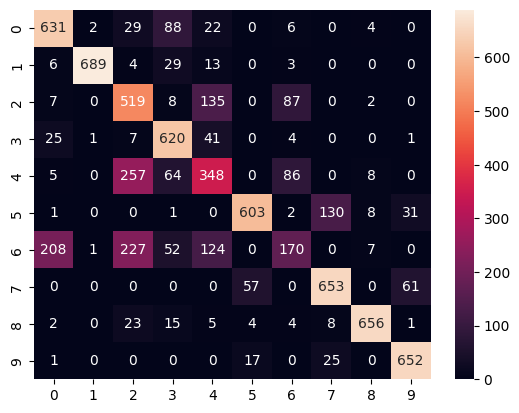

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo', probability=True)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(accuracy_score(y_test,prediction))

prediction_probs = clf.predict_proba(X_test)
print(roc_auc_score(y_test, prediction_probs, multi_class='ovo'))

sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='.5g')

0.6732
0.9461565955946406


<Axes: >

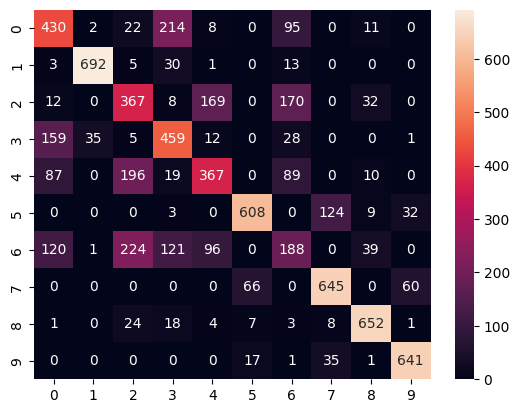

In [ ]:
#Logistic Regression for CHATGPT part TSNE
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=5000).fit(X_train, y_train)
prediction = clf.predict(X_test)
prediction_probs = clf.predict_proba(X_test)
print(accuracy_score(y_test,prediction))
print(roc_auc_score(y_test, prediction_probs, multi_class='ovo'))
sns.heatmap(confusion_matrix(y_test,prediction), annot=True, fmt='.5g')

0.8576
0.9858710893522493


<Axes: >

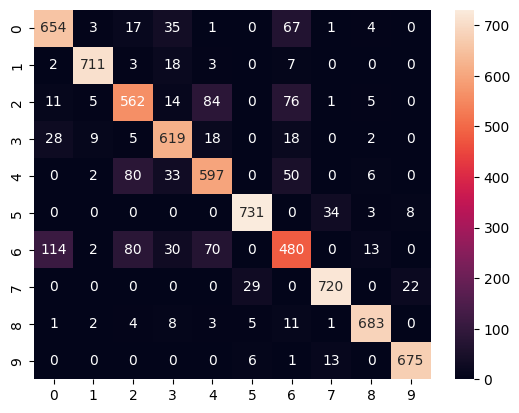

In [ ]:
#Logistic Regression for CHATGPT part
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

clf = LogisticRegression(random_state=0,max_iter=500).fit(X_pca_train, y_pca_train)
prediction = clf.predict(X_pca_test)
prediction_probs = clf.predict_proba(X_pca_test)
print(accuracy_score(y_pca_test,prediction))
print(roc_auc_score(y_pca_test, prediction_probs, multi_class='ovo'))
sns.heatmap(confusion_matrix(y_pca_test,prediction), annot=True, fmt='.5g')

(10000, 2)
Rand Score = 0.7628536653665366
AMI Score = 0.5994134594036484
ARI Score = 0.3151535700614209


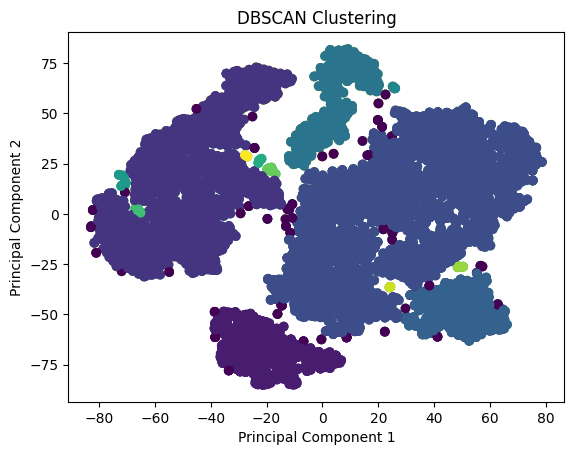

In [ ]:
#DBSCAN for 10k

array2 = resample(data, n_samples=10000, random_state=0)
array2 = pd.DataFrame(array2)
label2 = array2[0]
array2  = array2.drop(0, axis=1)

tsne2 = TSNE(2)
tsne2_array= tsne.fit_transform(array2)
print(tsne2_array.shape)
plt.scatter(tsne2_array[:,0], tsne2_array[:,1], c=label2)

clustering2 = DBSCAN(eps=2.7, min_samples=4).fit(tsne2_array)
predicted2 = clustering2.labels_

label2 = np.array(label2, dtype=int)

print_score(label2,predicted2)
print_scatter(tsne2_array,predicted2,'DBSCAN')
# print_result(predicted)


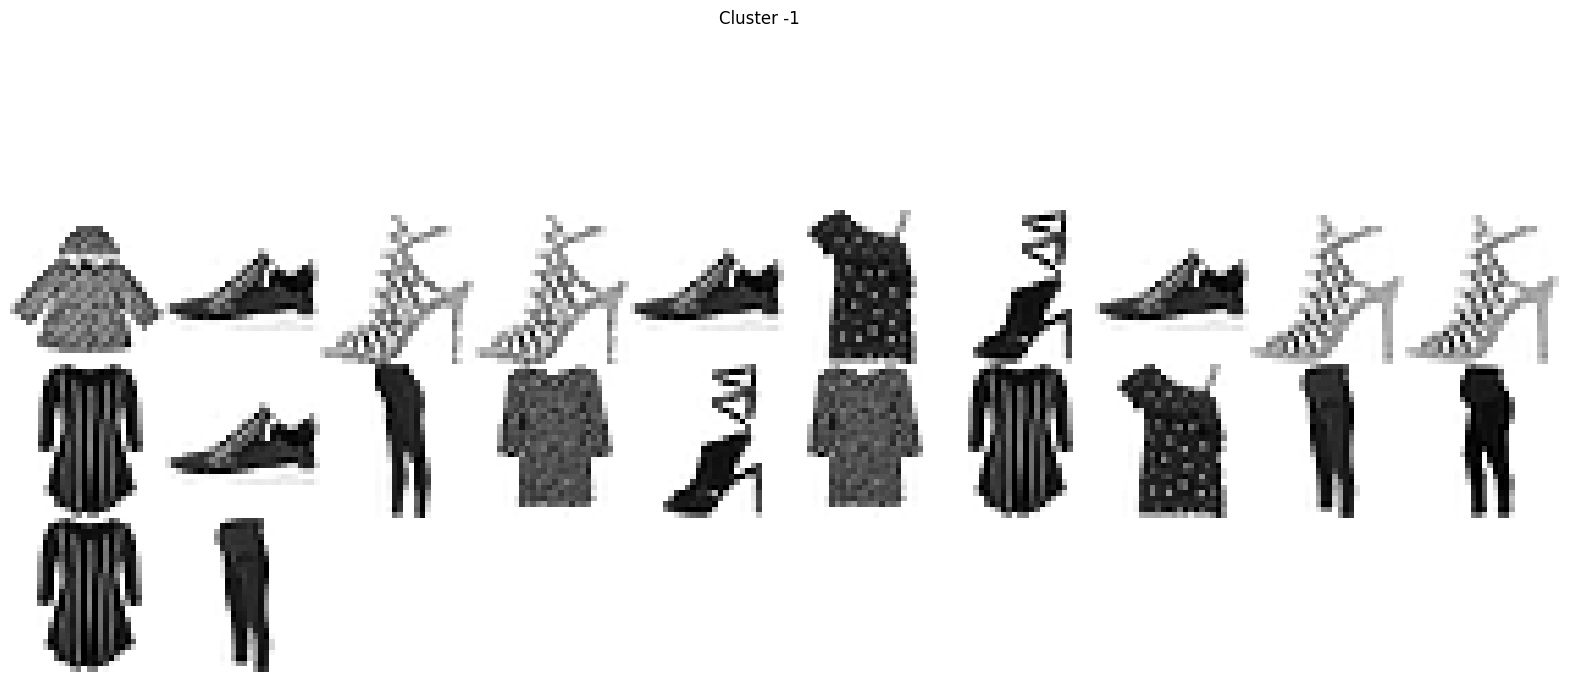

In [ ]:
show_cluster(-1, predicted)
# show_cluster(1, predicted)